In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funksjoner import Del1

filnavn = "../data/table.csv"

# Oppgave 2:

### 1.	Hvilke åpne datakilder er identifisert som relevante for miljødata, og hva er kriteriene (f.eks. kildeautoritet, datakvalitet, tilgjengelighet, brukervennlighet osv.) for å vurdere.
Vi har benyttet oss av miljødata fra Yr og SeKlima, som begge drives av meteorologisk institutt. Denne kilden har god kildeautoritet, da meteorologisk institutt er en norsk statlig organisasjon med ansvar for værvarsling og forskningsvirksomhet innenfor meteorologi. Værdataen er derfor også kvalitetssikret data som vi kan stole på at den stemmer overens med virkeligheten. Alt av miljødata som vi har brukt finner vi gratis på internett med god tilgjengelighet for alle. Yr er enkel nettside som hovedsakelig viser informasjon om været, mens SeKlima viser mer detaljert data som passer vår bruk. 
Dataen vi har hentet er en csv-fil lastet ned fra Norsk Klimaservicesenter. Denne ble hentet ved å spsifisere hvilke tidsoppløsning, værelementer, tidsrom og for hvilke stasjon. Vi valgte henoldsvis timer, høyeste vindkast og Lufttempratur, 01.01.2024-01.01.2025, Slettnes Fyr. 

### 2. Hvilke teknikker (f.eks. håndtering av CSV-filer, JSON-data) er valgt å bruke for å lese inn dataene, og hvordan påvirker disse valgene datakvaliteten og prosessen videre?
Vi har valgt å bruke Pandas sin funksjonalitet i form av pandas.read_csv(). Denne er 	effektiv for å behandle CSV-filer i Python. Gjennom å bruke dette merket vi at pandas 	tolket informasjonen godt, og ga oss de svarene vi var ute etter. 

### 3.	Dersom det er brukt API-er, hvilke spesifikke API-er er valgt å bruke, og hva er de viktigste dataene som kan hentes fra disse kildene?
Vi har valgt å ikke brukt APIer fordi vi benytter oss av historiske data fra 2024 som vi har hentet fra SeKlima. API er effektiv til data som kan oppdateres underveis, men siden vi bruker historiske data er ikke det nødvendig for oss å bruke API.

In [2]:
del1 = Del1(filnavn)
data = del1.load_data()

# Sjekke datatyper og for manglende verdier
print("Data:\n", data.head(), "\n")
print("Datatyper:\n", data.dtypes)
print("Manglende verdier:\n", data.isnull().sum(), "\n")


Data:
            Navn  Stasjon Tid(norsk normaltid) Høyeste vindkast (1 t)  \
0  Slettnes Fyr  SN96400     01.01.2024 01:00                   10,3   
1  Slettnes Fyr  SN96400     01.01.2024 02:00                    9,9   
2  Slettnes Fyr  SN96400     01.01.2024 03:00                    8,1   
3  Slettnes Fyr  SN96400     01.01.2024 04:00                    8,9   
4  Slettnes Fyr  SN96400     01.01.2024 05:00                    8,3   

  Lufttemperatur  
0           -7,2  
1           -6,9  
2           -8,8  
3           -8,6  
4           -7,6   

Datatyper:
 Navn                      object
Stasjon                   object
Tid(norsk normaltid)      object
Høyeste vindkast (1 t)    object
Lufttemperatur            object
dtype: object
Manglende verdier:
 Navn                      0
Stasjon                   1
Tid(norsk normaltid)      1
Høyeste vindkast (1 t)    1
Lufttemperatur            1
dtype: int64 



# Oppgave 3:

### 1.	Hvilke metoder vil du bruke for å identifisere og håndtere manglende verdier i datasettet?
For å identifisere og håndtere manglende verdier i datasettet bruker vi Pandas.isnull(). Dette er en funksjon som sjekker etter manglende verdier i et datasett. Vi benyttet oss av denne da den gir oss en klar oversikt over hvor det er manglende data. 

### 2.	Kan du gi et eksempel på hvordan du vil bruke list comprehensions for å manipulere dataene?
Vi har brukt list comprehensions for å bytte komma med punktum i datasettet, slik at tallene tolkes som desimaltall. Vi har også brukt list comprehensions til å endre tiden i datasettet fra norsk normaltid til Python sitt datetime-format.

### 3.	Hvordan kan Pandas SQL (sqldf) forbedre datamanipuleringen sammenlignet med tradisjonelle Pandas-operasjoner?
Med Pandas SQL kan man bruke SQL-syntaks Pandas data som gjør det enklere å forstå informasjonen fra dataen. Sqldf kan gi kortere og mer oversiktlig kode som gjør det lettere å analysere og forstå store datasett. 

### 4.	Hvilke spesifikke uregelmessigheter i dataene forventer du å møte, og hvordan planlegger du å håndtere dem?
Vanlige problemer som vi forventer å møte kan være verdier som mangler og datatyper som er feil. Disse uregelmessighetene kan løses ved hjelp av list comprehensions og pandas-funksjoner som Pandas.isnull(). 

In [5]:
# lagre parametre for de interesserte kolonnene
time = "Tid(norsk normaltid)"
vind = "Høyeste vindkast (1 t)"
temp = "Lufttemperatur"

data = del1.clean_data()
data = del1.convert_to_datetime(time)
data = del1.convert_to_numerical(vind)
data = del1.convert_to_numerical(temp)


# Sjekke datatyper og for manglende verdier
print("Datatyper:\n", data.dtypes)
print("Manglende verdier:\n", data.isnull().sum(), "\n")

Datatyper:
 Navn                              object
Stasjon                           object
Tid(norsk normaltid)      datetime64[ns]
Høyeste vindkast (1 t)           float64
Lufttemperatur                   float64
dtype: object
Manglende verdier:
 Navn                      0
Stasjon                   1
Tid(norsk normaltid)      1
Høyeste vindkast (1 t)    1
Lufttemperatur            1
dtype: int64 



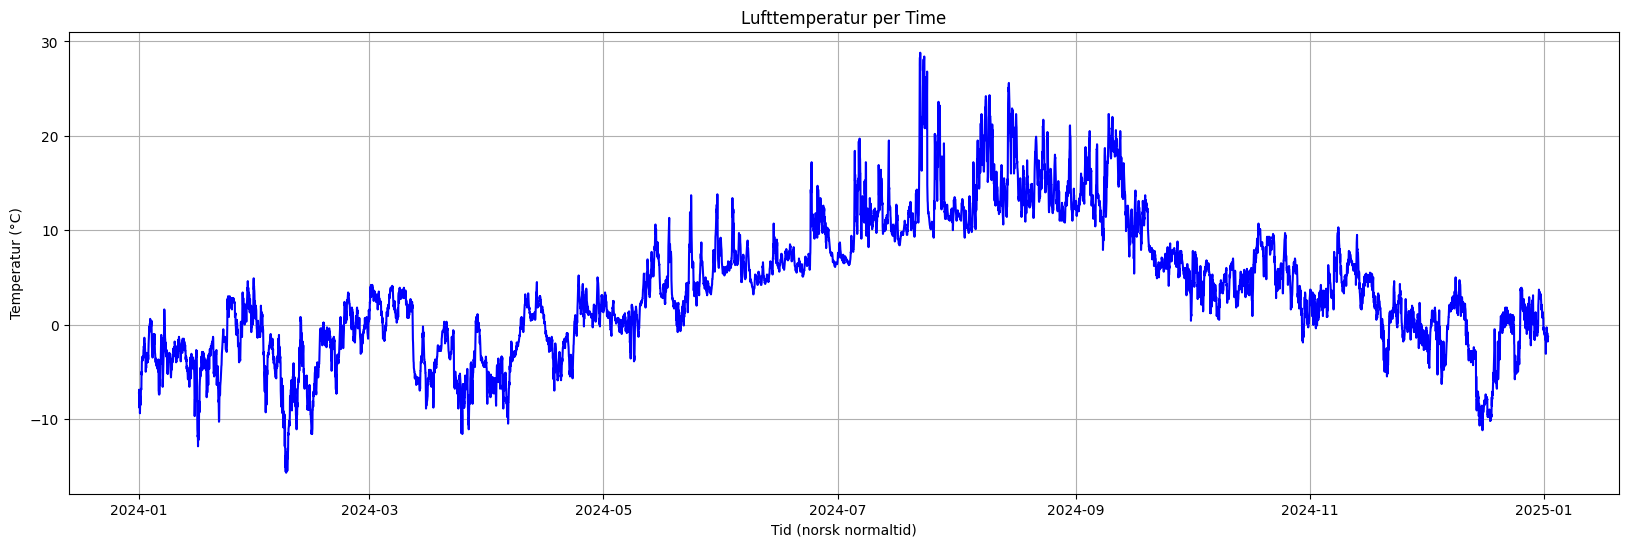

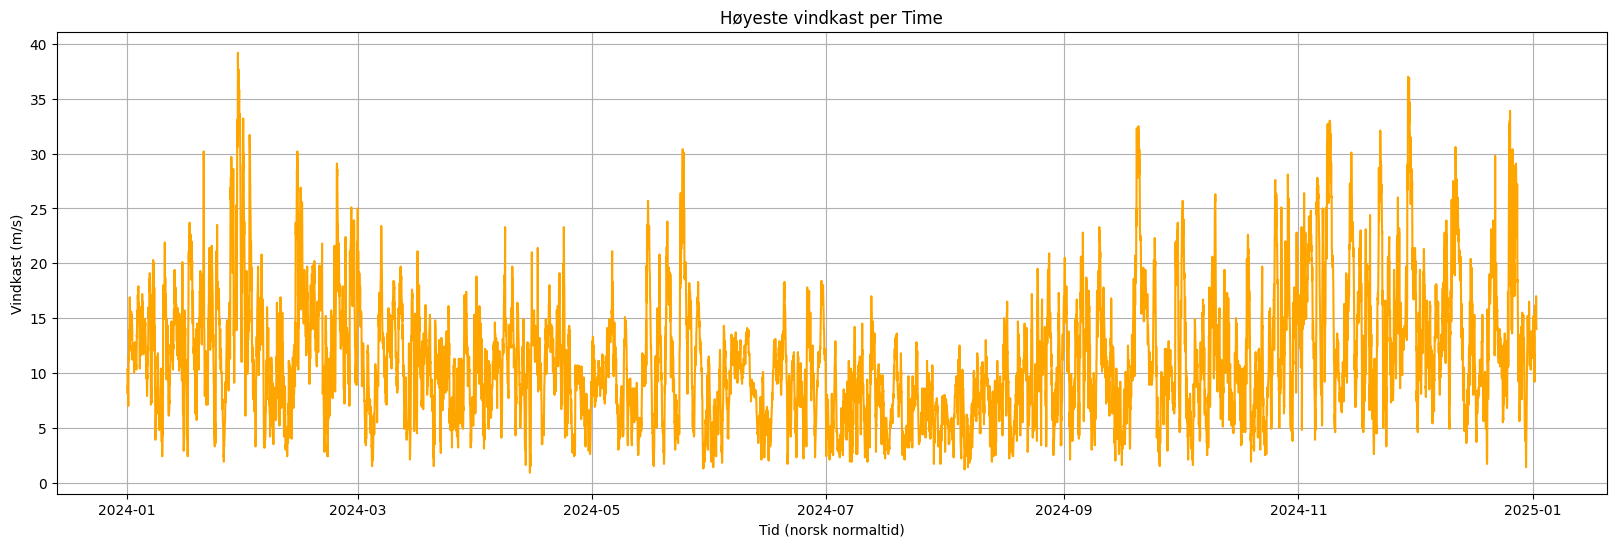

In [6]:
def plot_data(data):
    # Sjekke om data er tomt
    if data.empty:
        print("Ingen data å plotte.")
        return

    # Plotte gjennomsnittlig temperatur per time
    plt.figure(figsize=(20, 6))
    plt.plot(data[time], data[temp], color='blue')
    plt.title('Lufttemperatur per Time')
    plt.xlabel('Tid (norsk normaltid)')
    plt.ylabel('Temperatur (°C)')
    plt.grid()
    plt.show()

    # Plotte gjennomsnittlig nedbør per time
    plt.figure(figsize=(20, 6))
    plt.plot(data[time], data[vind], color='orange')
    plt.title('Høyeste vindkast per Time')
    plt.xlabel('Tid (norsk normaltid)')
    plt.ylabel('Vindkast (m/s)')
    plt.grid()
    plt.show()

plot_data(data)